In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prp
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples
from plot_silhouette_w_mean import plot_silhouette

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# EXPLORE DATA
## Load the data file and explore the data, showing size, data descriptions,
## data distributions with boxplot, pairplots . . 

In [1]:
# load dataset from file here using a url for semplicity
df =pd.read_csv("https://pokelab.ddns.net/datasets/15_01_24.csv", sep='\t')
display(df.size)
display(df.shape)

35887

(2111, 17)

In [2]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [3]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1055.00000,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,609.53753,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,527.50000,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,1055.00000,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,1582.50000,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,2110.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


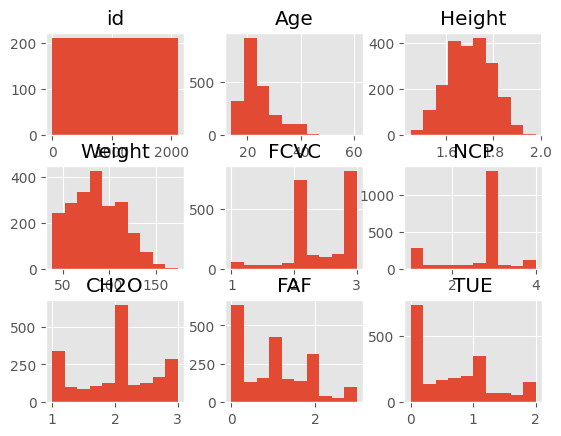

In [4]:
df.hist()
plt.show()

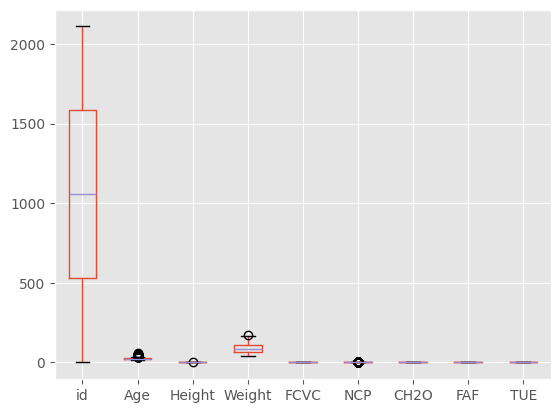

In [5]:
df.boxplot()
plt.show()

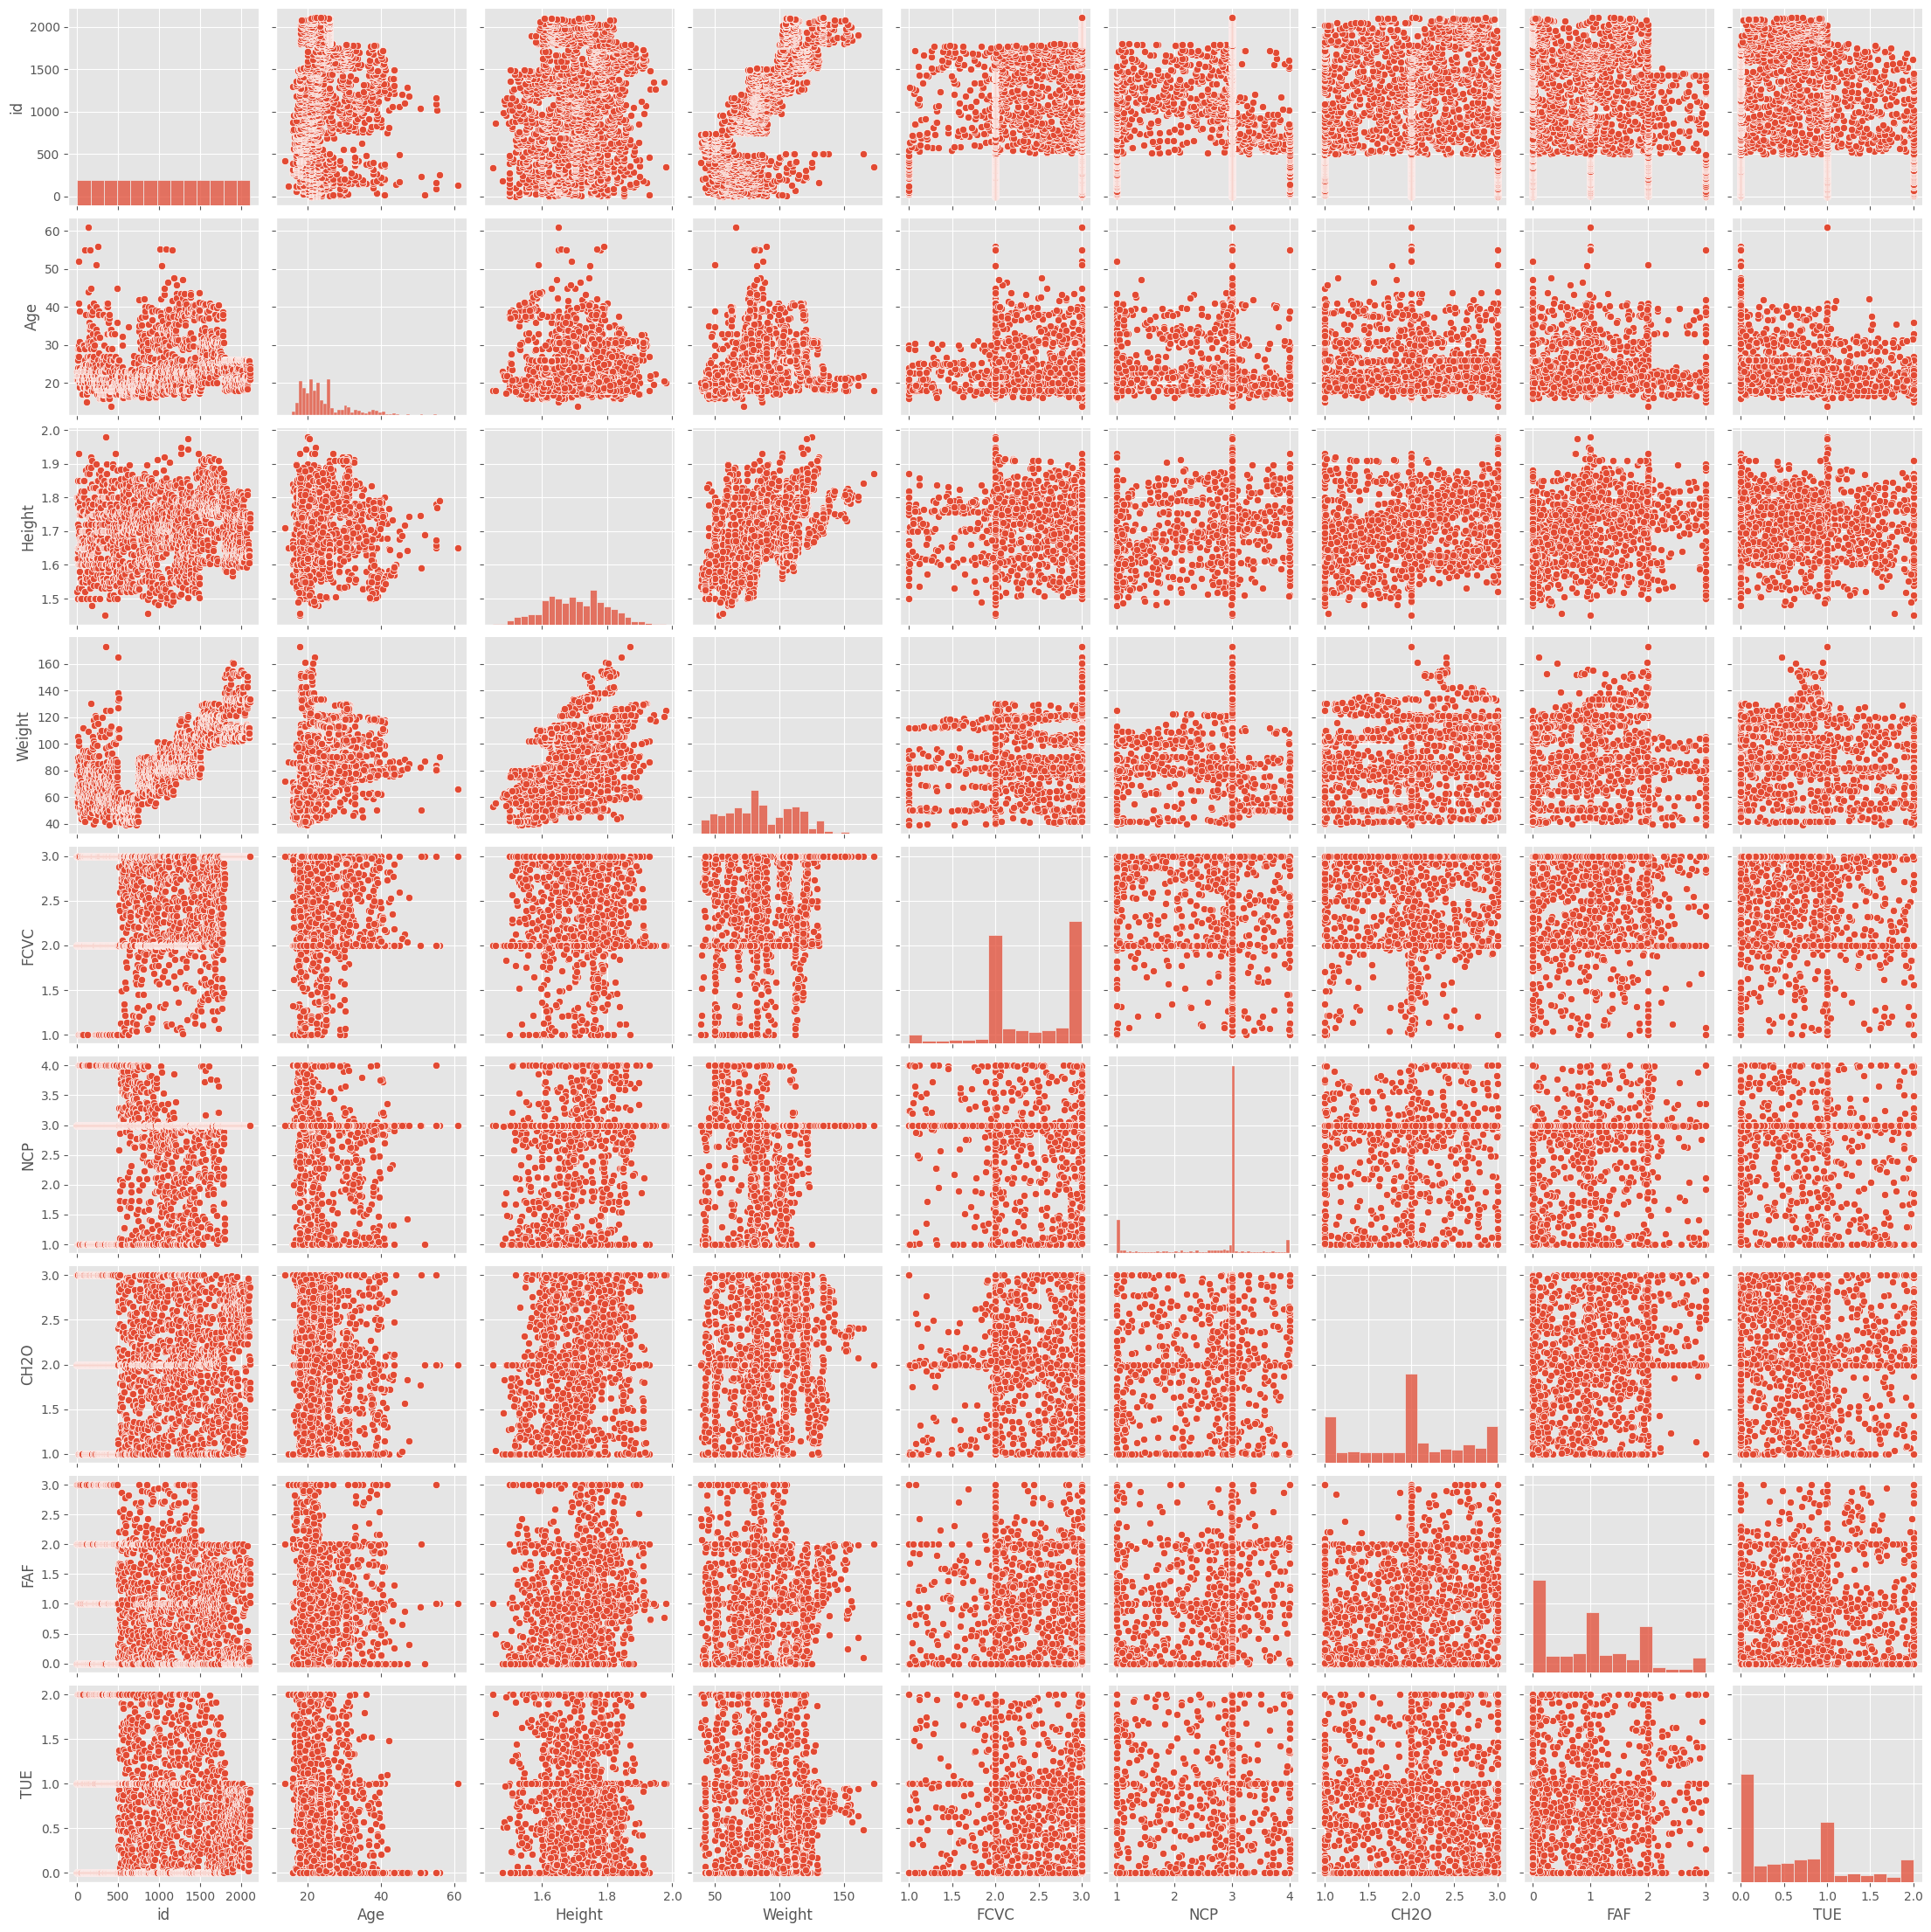

In [6]:
sns.pairplot(df)
plt.show()

## Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values, features that seem not to be relevant for clustering 

there are some concentrations in attributes values:

- CH20
- NCP
- FCVC

are concentrated around the same value

## Drop the columns that are not relevant for the clustering operation, if any, and explain why you do that. 

In [ ]:
# dropping id wich has no meaning for clustering
df=df.drop(columns="id")

## Deal with missing values, if any.

In [ ]:
# removing dataframe row with at least one missing value
df=df.dropna()

## Transform the fields with type "object" and only two distinct values into ‘0/1‘ with OrdinalEncode

In [ ]:
oren=prp.OrdinalEncoder(dtype=np.int32)

for col in df.columns:
    if df[col].dtype=="object" and len(np.unique(df[col]))== 2:
        df[col]= oren.fit_transform(np.array(df[col]).reshape(-1, 1))

## Transform the other "object" fields with OneHotEncode

In [ ]:
ohen=prp.OneHotEncoder(handle_unknown="ignore",sparse_output=False,dtype=np.int32)

for col in df.columns:
    if df[col].dtype=="object" and len(np.unique(df[col]))> 2:
        df[col]= ohen.fit_transform(np.array(df[col]).reshape(-1, 1))

In [ ]:
mms = prp.MinMaxScaler()

for col in df.columns:
    if df[col].dtype != 'object':  #check if the elements from the column aren't of type 'object'
        df[col] = mms.fit_transform(np.array(df[col]).reshape(-1, 1))

## find the best clustering scheme with KMeans, show the silhouette plots of clusters, show the distribution of the resulting cluster labels (e.g. histogram or pie plot) . 

In [ ]:
silhouette=[]
inhertias=[]
k_values=range(2,11)

for k in k_values:
    km=KMeans(n_clusters=k)
    y_km = km.fit_predict(df)
    silhouette.append(silhouette_score(df, y_km))
    inhertias.append(km.inertia_)

(0.0, 1.0)

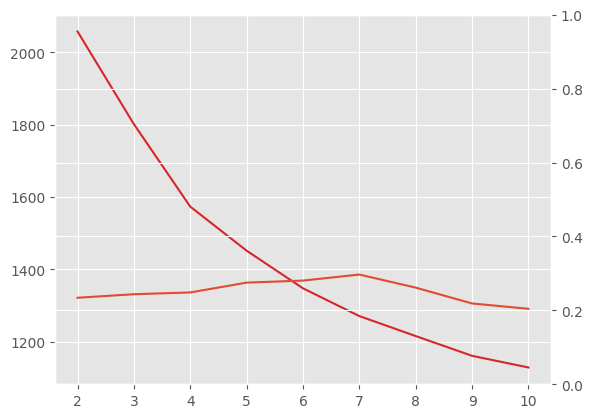

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(k_values, inhertias, color=color)

ax2=ax1.twinx()
ax2.plot(k_values,silhouette)
plt.ylim([0,1])

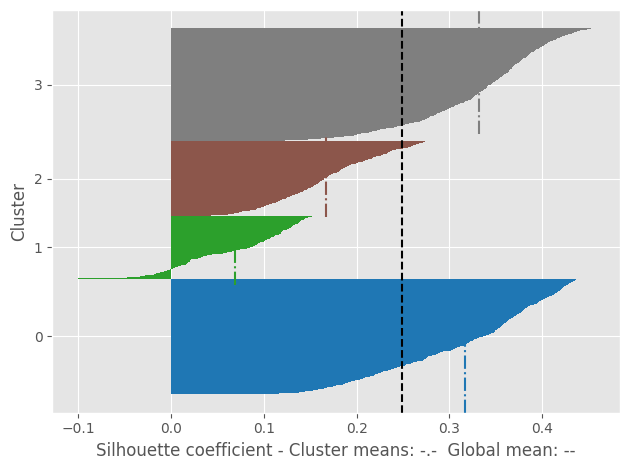

In [8]:
best_k=7
kms=KMeans(n_clusters=best_k)
y_km=kms.fit_predict(df)
score=silhouette_samples(df,y_km)
plot_silhouette(score,y_km)

## find the best clustering scheme with Agglomerative Clustering or DB-SCAN (your choice) show the silhouette plots of clusters, show the distribution of the resulting cluster labels (e.g. histogram or pie plot)

## Compare the similarities of the two schemes with the adjusted_rand_score and comment the results .